In [ ]:
'''
Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности
'''

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
frame = pd.read_csv(r'water.csv')

In [ ]:
df = frame

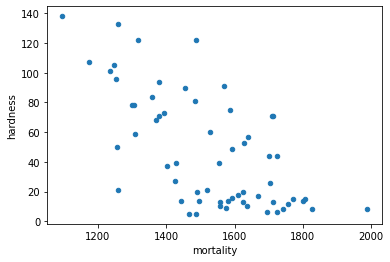

In [ ]:
# Точечный график
df.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
#Кореляция Пирсона и Спирмона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
df[['mortality', 'hardness']].corr(method = "spearman")

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
# Модель линейной регрессии
X = df[['mortality']]
y = df['hardness']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-0.12670202])

In [ ]:
model.intercept_

239.3678426140957

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

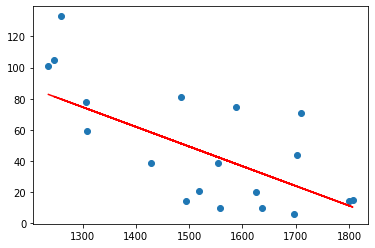

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Коэфицент детирминации 
model.score(X_test, y_test)

0.4948982822876836

In [ ]:
#График остатков
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           7.83e-06
Time:                        16:10:53   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

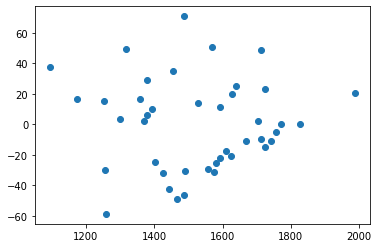

In [ ]:
plt.scatter(X_const.iloc[:, 1], results.resid)

In [ ]:
#Юг
south = df[df['location'] == 'South']

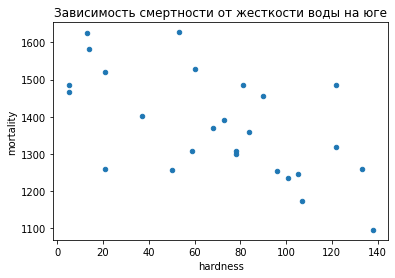

In [ ]:
south.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды на юге')

In [ ]:
#Коэффициент корреляции Пирсона
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
#Коэффициент корреляции Спирмена
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
X = south[['hardness']]
y = south['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [ ]:
model.coef_

array([-3.07466127])

In [ ]:
model.intercept_

1595.4337548999538

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

In [ ]:
res_south = X_test.copy()

res_south['y_pred'] = y_pred
res_south['y_test'] = y_test
res_south

,hardness,y_pred,y_test
18,122,1220.325080,1318
38,5,1580.060449,1486
0,105,1272.594322,1247
58,122,1220.325080,1486
27,37,1481.671288,1402
19,21,1530.865868,1260


In [ ]:
#Значение коэффициента детерминации
model.score(X_test, y_test)

-1.9300174406554644

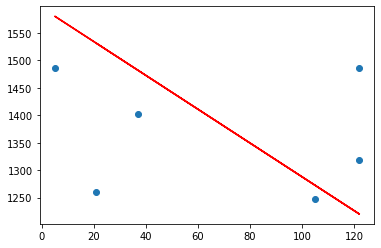

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

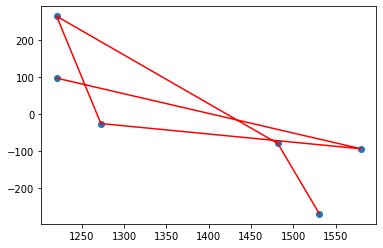

In [ ]:
#График остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

In [ ]:
#Север
north = df[df['location'] == 'North']

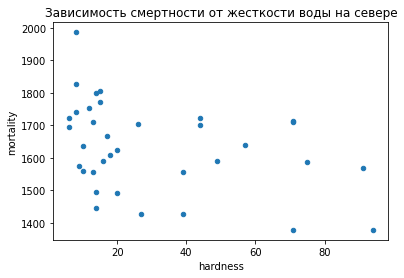

In [ ]:
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды на севере')

In [ ]:
#Коэффициент корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
#Коэффициент корреляции Спирмена
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
X = north[['hardness']]
y = north['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [ ]:
model.coef_

array([-2.25038888])

In [ ]:
model.intercept_

1694.905301402942

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [ ]:
#Сравнение прогноза с фактом
res_north = X_test.copy()
res_north['y_pred'] = y_pred
res_north['y_test'] = y_test
res_north

,hardness,y_pred,y_test
45,8,1676.902190,1987
23,9,1674.651801,1574
43,14,1663.399857,1444
36,6,1681.402968,1724
26,16,1658.899079,1591
50,71,1535.127691,1713
31,44,1595.888191,1702


In [ ]:
#Значение коэффициента детерминации
model.score(X_test, y_test)

-0.18101539518829401

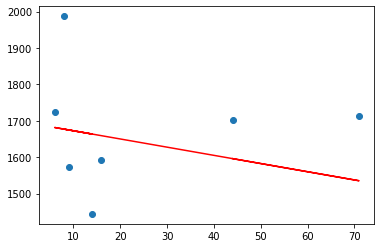

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

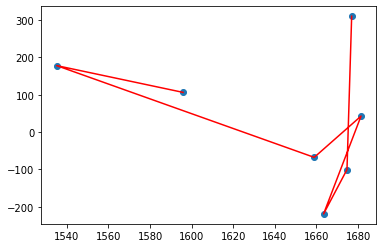

In [ ]:
#График остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')